## Binary Classification with MNIST — Detecting the Digit 5
###Objective
In this exercise, you will build a binary classifier that can detect whether an image from the MNIST dataset represents the digit 5 or not-5.

You’ll work through the process of:

* Loading and preparing the data
* Creating binary target vectors
* Training a simple model using stochastic gradient descent (SGD)
* Evaluating your model’s performance

###Background
The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0–9), each 28×28 pixels, flattened into a vector of 784 features, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). We can see this by inspecting the shape, X.shape, y.shape.

This set has been studied so much that it is often called the “hello world” of Machine Learning.

For this task, we’ll turn it into a binary classification problem:

* Label 5 as the positive class (True)
* Label all other digits (i.e 0–4, 6–9) as the negative class (False)


## Instructions


##Step 1: Load the MNIST Dataset

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


##Step 2: Create the Test Set

In [10]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Step 3: Create Binary Target Vectors

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

##Step 4: Train a Classifier


In [13]:
from sklearn.linear_model import SGDClassifier

classifer = SGDClassifier(random_state=42)
classifer.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

##  Step 5: Make Predictions

In [14]:
y_pred = classifer.predict(X_test)

## Metrics

In [30]:
from sklearn.metrics import accuracy_score

print(f"The Accuracy of the model is: {accuracy_score(y_test, y_pred)}")

The Accuracy of the model is: 0.0919


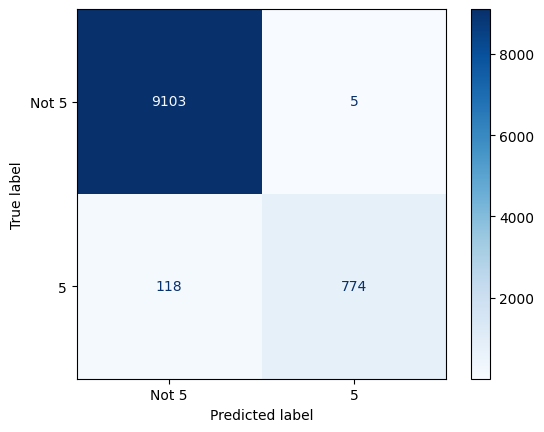

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test_5, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not 5", "5"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## For Random Classiffer

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train_5)


RandomForestClassifier(random_state=42)

In [33]:
y_pred_rf = clf.predict(X_test)

In [34]:
print(f"The Accuracy of the model is: {accuracy_score(y_test, y_pred_rf)}")

The Accuracy of the model is: 0.0981
